FNU Krithika Jain       G01462514        minerUsername: fkrithik

In [32]:
# imported all the necessary libraries
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
#loading and reading the train file and splitting them into labels and text list
train_filepath = '/content/train_new.txt'
with open(train_filepath,"r") as f1:
  train_lines=f1.readlines()

labels = [int(s.split("\t",1)[0]) for s in train_lines]
text = [s.split("\t",1)[1] for s in train_lines]

#loading and reading the test data
test_filepath = '/content/test_new.txt'
with open(test_filepath,"r") as f2:
  test_lines=f2.readlines()

#loading the ground truth file and storing them as a list
groundtruth_file ='/content/train_new_ground_truth.txt'
with open(groundtruth_file, "r") as f3:
  groundlines = f3.readlines()
true_labels = [int(line.strip()) for line in groundlines]

# printing to test
print(labels[3])
print(text[45])
print(test_lines[0])

-1
Wow...OK. So, after reading the little feud on here, I decided I had to see this movie for myself. This movie is HORRIBLE. I stopped watching it. I strongly recommend cleaning a closet instead of watching this movie, you'll be more spooked/entertained.<br /><br />It's low budget with bad acting.<br /><br />Whoever is giving this movie 10s is completely incorrect and should be disregarded.<br /><br />I am in no way connected to any of the other reviewers.<br /><br />Simply put, this movie is not worth watching.<br /><br />Very, very BAD MOVIE. #EOF

This is a very low budget film, set in one location in a valley shielded by the effects of radiation. The cast, an older man and daughter, a handsome visitor, a couple (a tough buy and gal), a drifter, a donkey and a radiation affected man, interact during the after effects of a nuclear blast. Added to this is an entity watching the women take a bath.<br /><br />They all have guns, some of them get shot, some of them are told to have chil

In [34]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
#Data preprocessing of datasets
def preprocessing(rawdata):
  reviews=[]
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  stop = set(stopwords.words("english"))
  for review in rawdata:
    notags = re.sub('(<[\w\s]*/?>)',"",review) #removed html tags
    onlytext = re.sub("[^a-zA-Z]"," ",notags) #removed the non-alphabet characters
    ele = word_tokenize(onlytext.lower()) #tokenized and converted to lower case
    filtered_words =[word for word in ele if word not in stop and len(word)>3] #removed stop words and words that have length less than 3
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words] #performed lemmatization
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words] #stemmed the words
    reviews.append(' '.join(filtered_words)) #appended them into a list
  return reviews


In [36]:
#cleaning of train and test datasets
cleanTrain= preprocessing(text)
cleanTest = preprocessing(test_lines)

# printing to test
print(cleanTrain[2])
print(cleanTest[2])

released thought profane films ever made however thanks martin scorcese filmmakers like mainline films worse language wise pretty brutal assault ears take ridiculous first minutes alone heard half dozen usage lord name vain plus untold number words wonder many people walked theater watching surprisingly feature actors included jennifer jason leigh burt young jerry orbach rikki lake since film stephen lang seems improved image least playing godly stonewall jackson gods generals lang role opposite perhaps worst trashy person film character falls love transvestite film depressing gloomy semi pornographic repulsive adjectives people used even liberal critics describing story painted even worse novel course better known critics extreme libs praised movie however ones critics disgusted well almost paying public unbelievable anyone could praise filth garbage like trust good likable characters entire movie mean sick film worst modern unless enjoy seeing child abuse drug abuse teen prostitutes 

In [37]:
#Feature engineering by initiaizing the TF-IDF Vectorizer with customised parameters
tfidf_vector = TfidfVectorizer(max_features=10000,min_df=2,max_df=0.95)
Xtrain_tfidf = tfidf_vector.fit_transform(cleanTrain)
Xtest_tfidf = tfidf_vector.transform(cleanTest)

#printing to check the dimensions
print(type(Xtrain_tfidf),Xtrain_tfidf.shape)
print(type(Xtest_tfidf),Xtest_tfidf.shape)


<class 'scipy.sparse._csr.csr_matrix'> (25000, 10000)
<class 'scipy.sparse._csr.csr_matrix'> (25000, 10000)


In [38]:
# splitting the data into training and validation sets in the ratio 80-20
X_train, X_val, y_train, y_val = train_test_split(Xtrain_tfidf, labels, test_size=0.3, random_state=42)

In [44]:
# training the knn classifer for k=125
knn_class = KNeighborsClassifier(n_neighbors=125,metric='cosine')
knn_class.fit(X_train,y_train)

#predicting validation data
val_predictions = knn_class.predict(X_val)
accuracy= accuracy_score(y_val,val_predictions)
print("validation accuracy",accuracy)

#predicting test data with ground truth values
test_predictions = knn_class.predict(Xtest_tfidf)
test_accuracy = accuracy_score(true_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

validation accuracy 0.814
Test Accuracy: 0.50032


In [42]:
# implementing the knn classifer again by reducing the dimensionality using svd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)
X_train_svd = svd.fit_transform(X_train)
X_val_svd = svd.transform(X_val)
X_test_svd = svd.transform(Xtest_tfidf)

# training the knn classifer for k=125
knn_class = KNeighborsClassifier(n_neighbors=157,metric='cosine')
knn_class.fit(X_train_svd,y_train)

#predicting validation data
val_predictions = knn_class.predict(X_val_svd)
accuracy= accuracy_score(y_val,val_predictions)
print("validation accuracy",accuracy)

#predicting test data with ground truth values
test_predictions = knn_class.predict(X_test_svd)
test_accuracy = accuracy_score(true_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

validation accuracy 0.7957333333333333
Test Accuracy: 0.49856


In [45]:
# Writing the test predictions to a file in the required format
test_predictions_file = '/content/test_predictions.txt'
with open(test_predictions_file, "w") as f:
    for prediction in test_predictions:
        f.write(f"{prediction}\n")

I have build my own knn classifier here to check for the appropriate value of k, using cosine distance metric because of it's use in text data, high dimenionality and comparatively faster runtime.

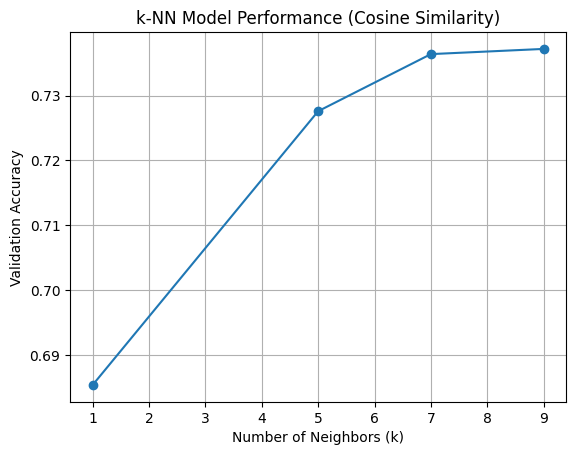

In [ ]:
#loading and reading the train file and splitting them into labels and text list
train_filepath = '/content/train_new.txt'
with open(train_filepath,"r") as f1:
  train_lines=f1.readlines()

labels = [int(s.split("\t",1)[0]) for s in train_lines]
features = [s.split("\t",1)[1] for s in train_lines]

#loading and reading the test data
test_filepath = '/content/test_new.txt'
with open(test_filepath,"r") as f2:
  test_lines=f2.readlines()

class KNNclassify:
  def __init__(self,kval,similarity='similarity') :
    self.kval=kval
    self.similarity = similarity
    self.accuracies=[]

  # def euclidean_dist(self,a,b):
  #   return np.sqrt(np.sum(np.square(np.subtract(a,b))))

  def cosine_similarity(self,a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

  def k_nn_classification(self, X_train, y_train, X_val, k ):
    predictions = []

    for test_instance in X_val:
        similarities = [self.cosine_similarity(test_instance, train_instance) for train_instance in X_train]
        nearestNeighbors = np.argsort(similarities)[::-1][:k]
        neighbor_labels = [y_train[i] for i in nearestNeighbors]
        predicted_label = Counter(neighbor_labels).most_common(1)[0][0]
        predictions.append(predicted_label)
    return predictions

  def evaluate(self, y_true, y_pred):
    acc = accuracy_score(y_true,y_pred)
    return acc

  def holdout(self, X, y, test_size=0.2, random_state=42):
    # splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    for k in self.kval:
       y_pred = self.k_nn_classification(X_train, y_train, X_val, k)
       accuracy = self.evaluate(y_val, y_pred)
       self.accuracies.append(accuracy)

  def plot_results(self):
        plt.plot(self.kval, self.accuracies, marker='o')
        plt.title(f'k-NN Model Performance ({self.similarity.capitalize()} Similarity)')
        plt.xlabel('Number of Neighbors (k)')
        plt.ylabel('Validation Accuracy')
        plt.grid(True)
        plt.show()

if __name__=="__main__":
  kval=[1,5,7,9]
  knn_cosine = KNNclassify(kval,similarity='cosine')

  knn_cosine.holdout(X_train,y_train)
  knn_cosine.plot_results()